In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import scipy
import csv
import pandas as pd
df = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\05_CompiledMonthly\CSV\2022_Feb.csv")
df.dropna(inplace=True) # Drop null values
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
df.set_index('id', inplace=True)
df.head()

,spacetype,spacetype_1,area,vol,level,h,orien,nef,aef,lef,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
301_BS_O_O01,Offices,Shared Cellular Offices,24.00,90.00,-1,3.75,5,1,22.50,0.00759,...,0.2500,0.9375,18.59,11.39,0.00545,0.707,13.625,0.665,63.63000,2.828000
301_BS_O_O02,Offices,Shared Cellular Offices,12.00,45.00,-1,3.75,5,1,11.25,0.00380,...,0.2500,0.9375,18.73,11.52,0.00543,0.648,13.621,0.665,29.16000,2.592000
301_BS_O_O03,Offices,Shared Cellular Offices,10.00,37.50,-1,3.75,5,1,9.37,0.00316,...,0.2499,0.9370,18.14,10.93,0.00531,0.610,14.062,0.686,22.87500,2.441302
301_BS_O_O04,Offices,Shared Cellular Offices,16.50,61.88,-1,3.75,5,1,11.25,0.00380,...,0.1818,0.6818,18.34,11.13,0.00533,0.441,13.800,0.673,27.28908,2.425696
301_BS_O_O05,Offices,Shared Cellular Offices,24.75,92.81,-1,3.75,320,2,20.63,0.00696,...,0.2223,0.8336,18.16,10.95,0.00532,0.787,13.918,0.679,73.04147,3.540546


In [12]:
from pygam import GAM, s, f, l
from pygam import LinearGAM
from sklearn.metrics import mean_absolute_error

In [4]:
#gam.confidence_intervals(X, width=0.95, quantiles=None)

In [5]:
#gam.loglikelihood(X, y, weights=None)#

In [13]:
df3 = df[['orien', 'nef', 'aef', 'aefa', 'lpw', 'q4','ach', 'hum']]
target_df3 = pd.Series(df.pm25)
df3.head()

,orien,nef,aef,aefa,lpw,q4,ach,hum
id,,,,,,,,
301_BS_O_O01,5,1,22.50,0.9375,0.02775,2.828000,0.707,0.00545
301_BS_O_O02,5,1,11.25,0.9375,0.02063,2.592000,0.648,0.00543
301_BS_O_O03,5,1,9.37,0.9370,0.01969,2.441302,0.610,0.00531
301_BS_O_O04,5,1,11.25,0.6818,0.02625,2.425696,0.441,0.00533
301_BS_O_O05,320,2,20.63,0.8336,0.02719,3.540546,0.787,0.00532


In [14]:
X1=df3
y1=target_df3
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42) # 80% training and 20% test

In [16]:
n_features =8 # number of features used in the model
lams = np.logspace(-3,3,100) * n_features
dist= np.random.uniform (1e-3, 1e3, (100,8))

In [17]:
#Fit a model with the default parameters
gam2= LinearGAM(s(0,n_splines=20)+f(1)+s(2,n_splines=20)+s(3,n_splines=20)+s(4,n_splines=20)+s(5,n_splines=20)+s(6,n_splines=20)+s(7,n_splines=20)).gridsearch(X_train.values,y_train.values, lam=dist)

gam2.summary()


100% (100 of 100) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.4048
Link Function:                     IdentityLink Log Likelihood:                                  -547.3221
Number of Samples:                          357 AIC:                                             1137.4538
                                                AICc:                                            1140.3204
                                                GCV:                                                1.4237
                                                Scale:                                               1.278
                                                Pseudo R-Squared:                                   0.8672
Feature Function                  Lam

C:\Users\arp17tka\AppData\Local\Temp/ipykernel_16544/271132832.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


In [20]:
# Predicting the target values of the test set
y_pred = gam2.predict(X_train)
predi = gam2.prediction_intervals(X_test, width=0.95)

In [21]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.098


In [22]:
# Calculate the absolute errors
errors = abs(y_pred - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.82 degrees.


In [23]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, gam2.predict(X_train)))

R2 Value: 0.8671519920759656


In [24]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_train - y_pred) / y_train)) * 100))

Accuracy 90.2600356309694


In [26]:
y_train.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\01_TestData.csv', index=False)



In [27]:
np.savetxt(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\intervals_tuned.txt', predi, delimiter=',')   # X is an array

In [28]:
predictions = pd.DataFrame(y_pred)
predictions.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\02_PredictedData_tuned.csv')

In [30]:
results = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\03_Results.csv")
results.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,13.326,14.374883
2,8.677,8.483220
3,13.097,12.933621
4,8.393,7.808589
5,12.958,9.824055
...,...,...
353,10.606,10.030763
354,7.690,7.271810
355,5.045,5.006438


(0.9313249952131167, 8.478685509099211e-158)

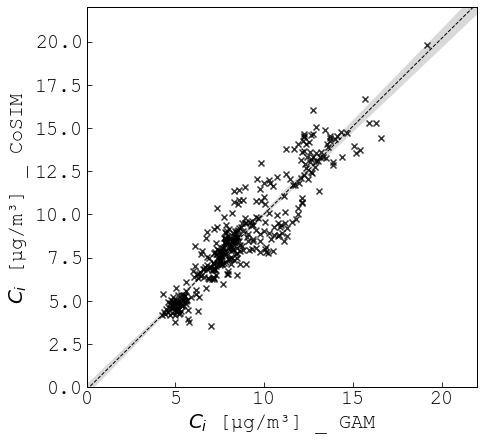

In [32]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.xlim(0,22,1)
plt.ylim(0,22,1)
plt.tick_params( direction="in", length=5)
ax = sb.regplot(x="Predicted_Values", y="True_Values", data=results, ci=95, truncate=False, scatter = True, line_kws={"color":"k","alpha":1,"lw":1, 'ls':'dashed'}, marker='x', color='k')
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ GAM ', fontname="Courier New")
plt.savefig('02_GAM_Reg_Post_TRAINING', dpi=150)
from scipy import stats
stats.pearsonr(results['Predicted_Values'], results['True_Values'])

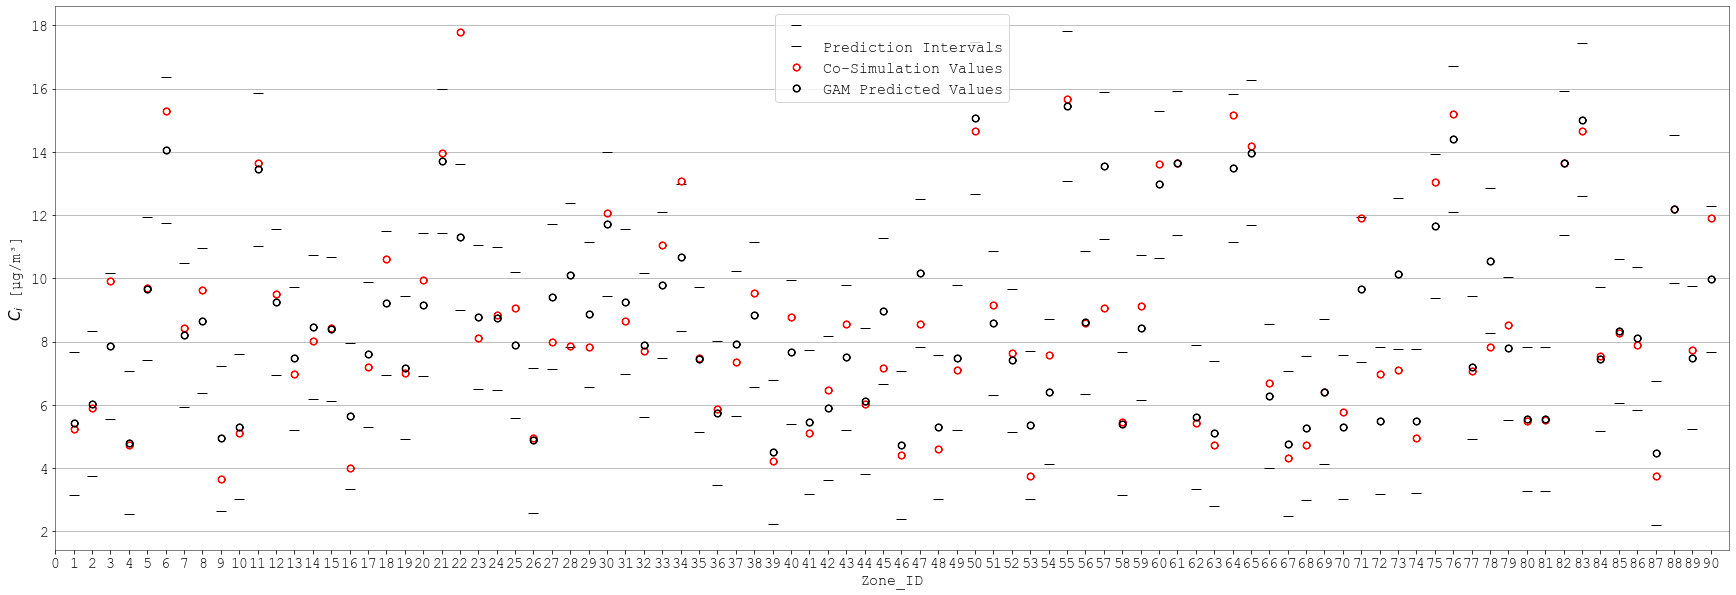

In [27]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(1,91,1)
plt.xticks(results['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results['Upper_pred'], c='k', ls='--', marker='_', label='Square', linewidth=0, markersize=10)
plt.plot(results['Lower_pred'], c='k', ls='--', marker='_', linewidth=0,  markersize=10)
plt.plot(results['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('','Prediction Intervals','Co-Simulation Values','GAM Predicted Values'))
plt.grid(axis='y')

plt.savefig('Jan_GAM_2022_60p', dpi=150)
plt.show()

(0.9239063788186567, 1.7596626475892735e-38)

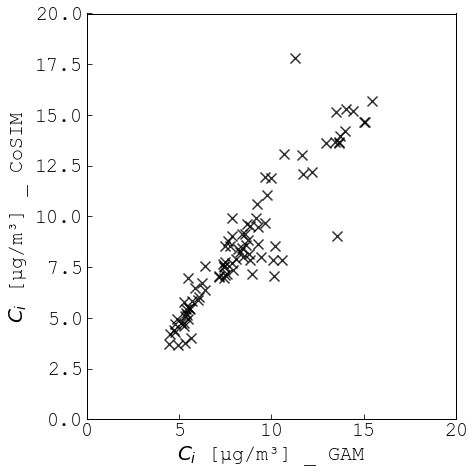

In [29]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ GAM ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Jan_GAM_2022_Pears_tuned_60p', dpi=150)
from scipy import stats
stats.pearsonr(results['True_Values'], results['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


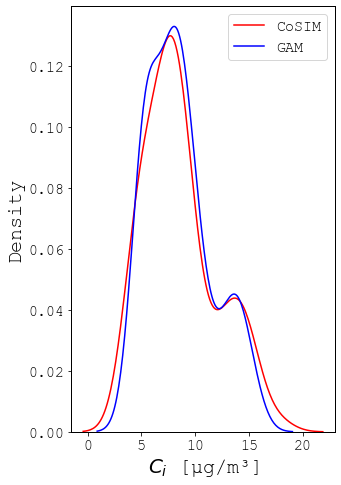

In [30]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results['Predicted_Values'], hist=False, color="b", label="fEBRUARY Indoor PM2.5 [\u03BCg/m\u00b3] (GAM)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','GAM'))
plt.savefig('Jan_GAM_2022_Density_60p_TUNED', dpi=150)
plt.show()
plt.close()

In [31]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(results['True_Values'], results['Predicted_Values'])), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.277


In [32]:
# Calculate the absolute errors
errors = abs(results['Predicted_Values'] - results['True_Values'])

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.8 degrees.


In [33]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred))

R2 Value: 0.8516427255471894


In [34]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((results['True_Values'] - results['Predicted_Values']) / results['True_Values'])) * 100))

Accuracy 90.25266845053241


In [26]:
#import numpy as np
#lam = np.logspace(-3, 10, 10)
#lams = [lam] * 9
#gam2.gridsearch(X, y, lam=lams)
#gam2.summary()

In [27]:
list(gam2.statistics_.keys())

['n_samples',
 'm_features',
 'edof_per_coef',
 'edof',
 'scale',
 'cov',
 'se',
 'AIC',
 'AICc',
 'pseudo_r2',
 'GCV',
 'UBRE',
 'loglikelihood',
 'deviance',
 'p_values']

In [58]:
gam2.statistics_['m_features']

15

In [51]:
import matplotlib.pyplot as plt


In [33]:
import shap

In [34]:
X100 = shap.utils.sample(X_train, 100) # 100 instances for use as the background distribution
# explain the GAM model with SHAP
explainer_gam2 = shap.Explainer(gam2.predict, X100)
shap_values_gam2 = explainer_gam2(X_train)

Exact explainer: 358it [02:31,  2.26it/s]                                                                              


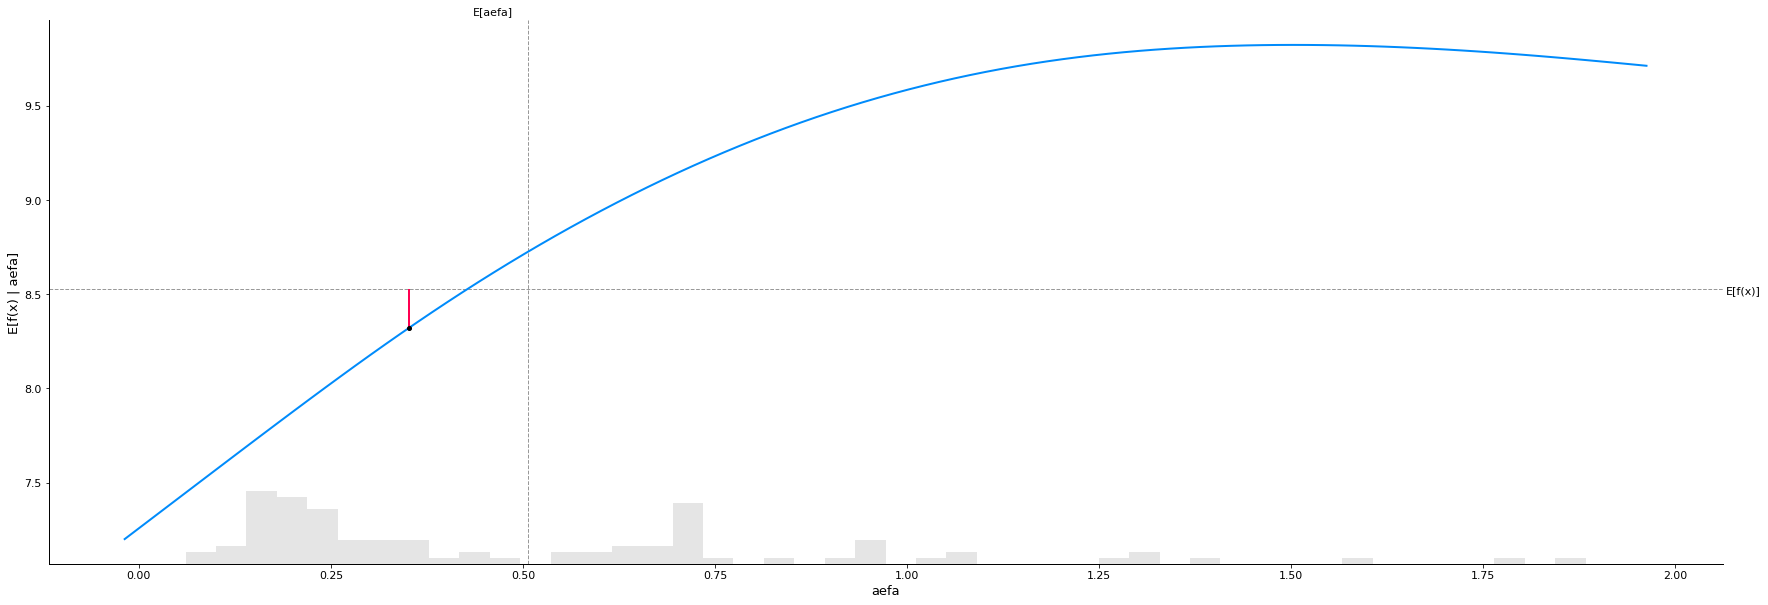

In [29]:
# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 1
fig,ax = shap.partial_dependence_plot(
    "aefa", gam2.predict, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_gam2[sample_ind:sample_ind+1,:]
)

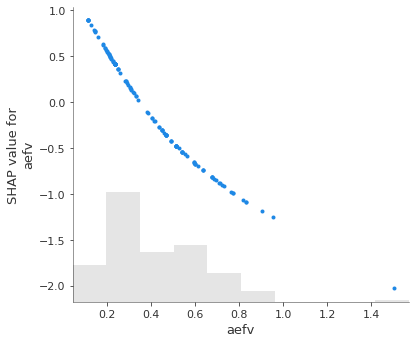

In [76]:
shap.plots.scatter(shap_values_gam2[:,"aefv"])

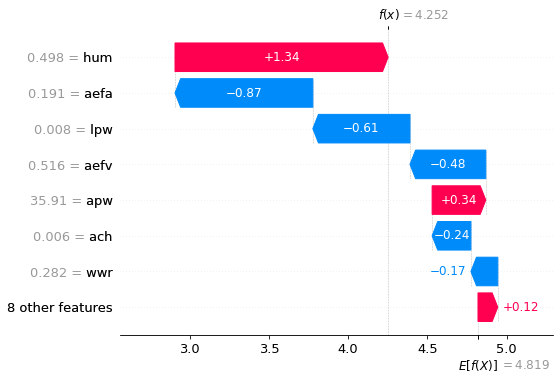

In [64]:
sample_ind=0
shap.plots.waterfall(shap_values_gam2[sample_ind], max_display=8)

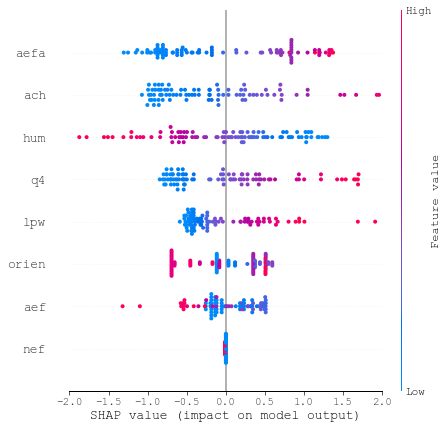

In [16]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})

plt.rcParams["axes.edgecolor"] = "black"

plt.rcParams["axes.linewidth"] = 1
shap.plots.beeswarm(shap_values_gam2, max_display=8, order=shap_values_gam2.abs.mean(0), plot_size=(7,7),show=False)
plt.xlim(-2,2,0.5)
plt.gcf().axes[-1].set_aspect(500)
plt.gcf().axes[-1].set_box_aspect(500)

plt.savefig('02_GAM_2022_SHAP_60p_Training', dpi=150)

not enough data in bin #3 for feature orien, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #8 for feature orien, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #15 for feature orien, so it'll be ignored. Try increasing the number of records to plot.


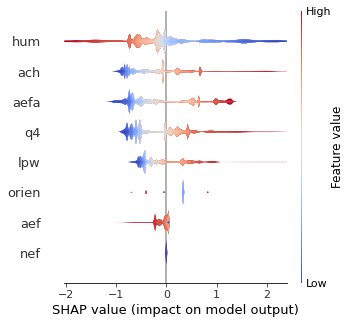

In [31]:
shap.summary_plot(shap_values_gam2, X_test,plot_size=(5,5), plot_type="layered_violin",show=False)
plt.gcf().axes[-1].set_aspect(500)
plt.gcf().axes[-1].set_box_aspect(500)

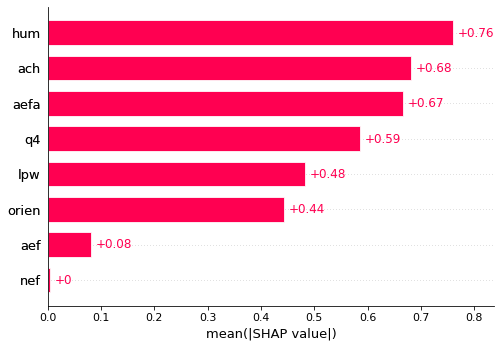

In [32]:
shap.plots.bar(shap_values_gam2)

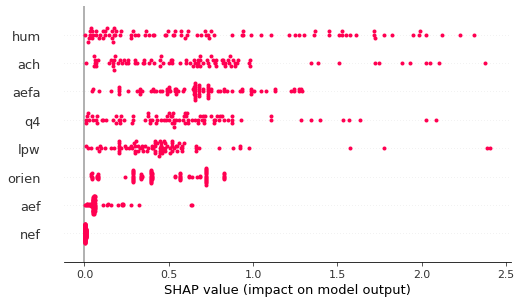

In [33]:
shap.plots.beeswarm(shap_values_gam2.abs, color="shap_red")

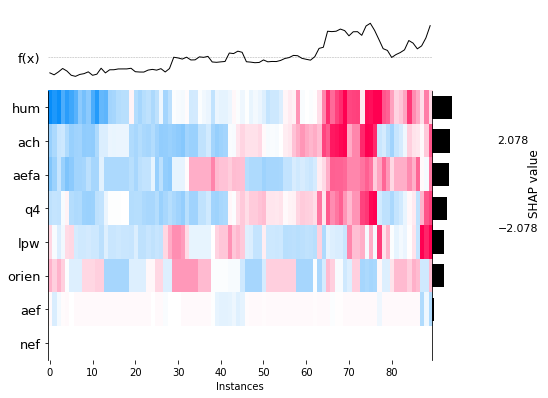

In [34]:
shap.plots.heatmap(shap_values_gam2,max_display=15)

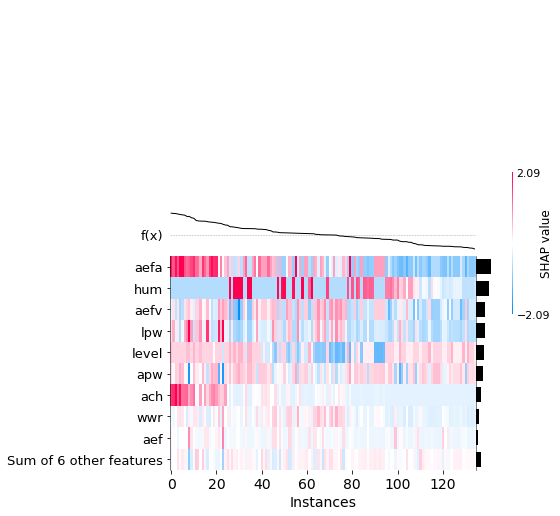

In [72]:
shap.plots.heatmap(shap_values_gam2, instance_order=shap_values_gam2.sum(1))

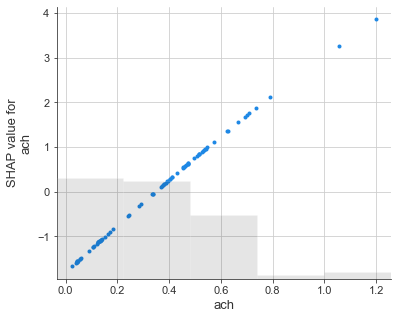

In [129]:
shap.plots.scatter(shap_values_gam2[:,"ach"])

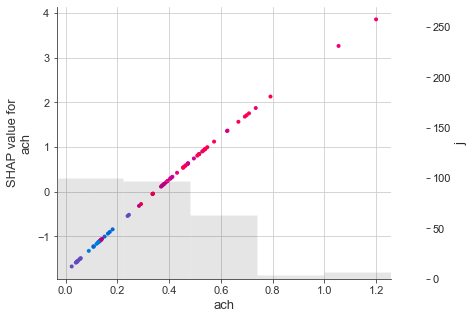

In [130]:
shap.plots.scatter(shap_values_gam2[:,"ach"], color=shap_values_gam2[:,"j"])

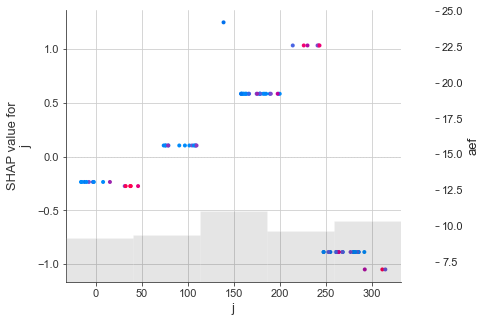

In [131]:
shap.plots.scatter(shap_values_gam2[:,"j"], color=shap_values_gam2)

In [132]:
clustering = shap.utils.hclust(X1, y1)


In [123]:
res = gam2.deviance_residuals(X_test, y_test)
err = y_test - y_pred
assert((res == err).all())

<AxesSubplot:>

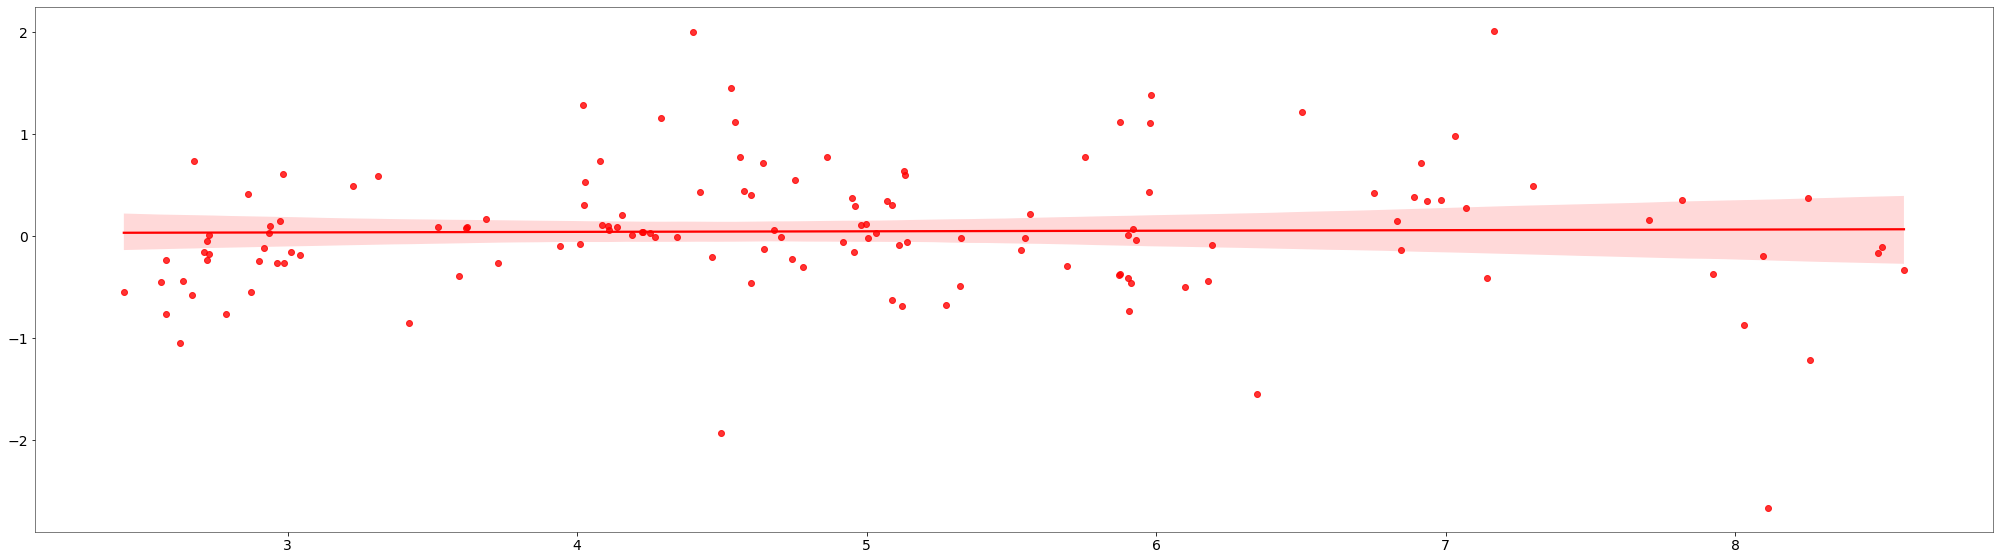

In [124]:
sb.regplot(x = y_pred, y = res, data = None, scatter = True, color = 'red') 

<AxesSubplot:xlabel='pm25'>

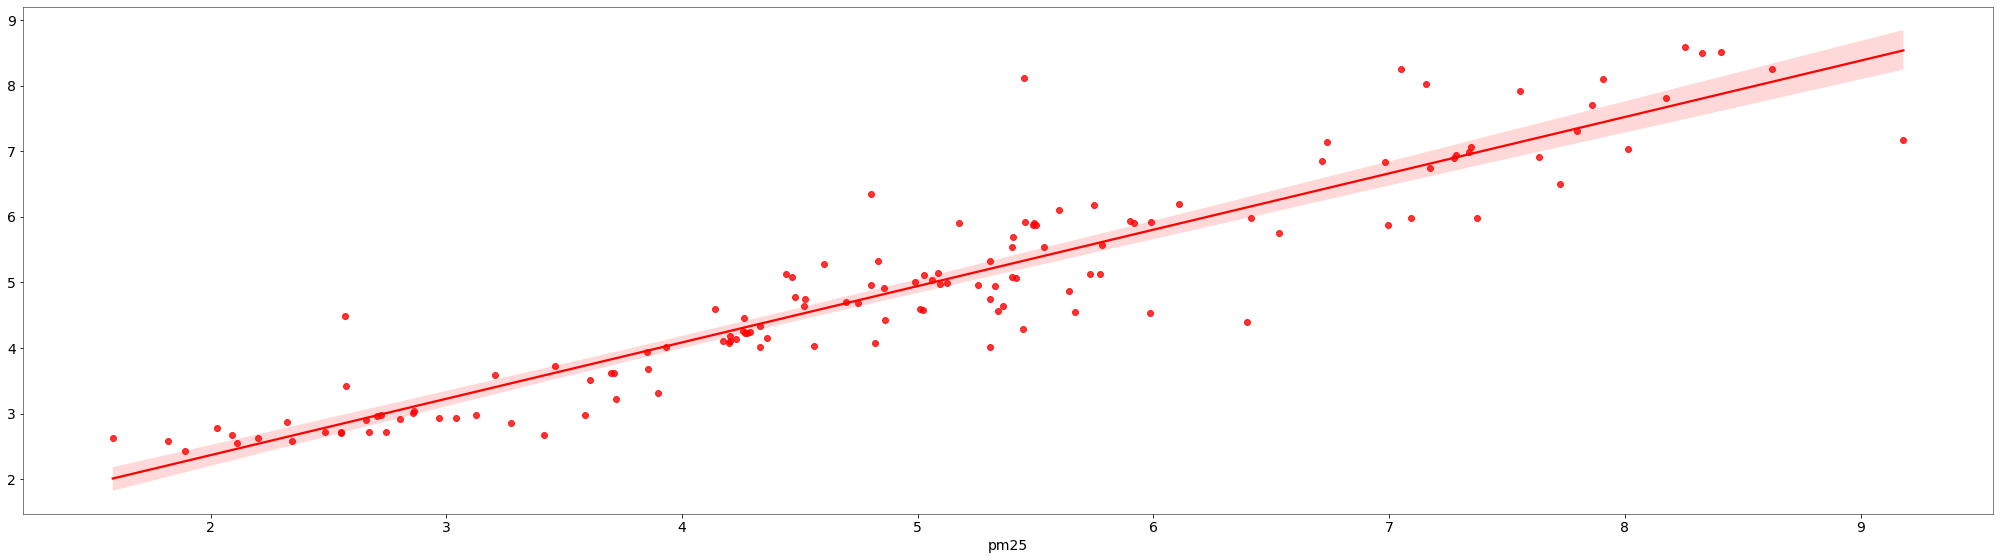

In [125]:
sb.regplot(x = y_test, y = y_pred, data = None, scatter = True, color = 'red') 

In [35]:
from sklearn.linear_model import Lasso

In [36]:
from yellowbrick.regressor import ResidualsPlot
lasso_model = Lasso()

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

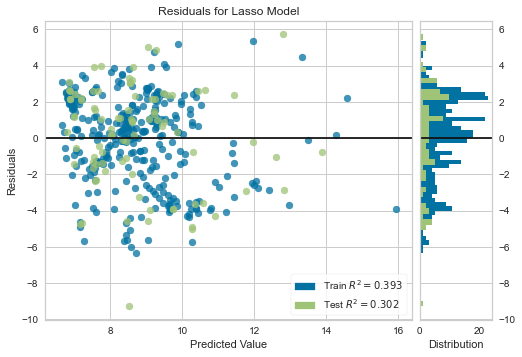

In [37]:
#create object and pass our lasso model created in above step
visualizer = ResidualsPlot(lasso_model) 
#fit training data
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

X does not have valid feature names, but Lasso was fitted with feature names


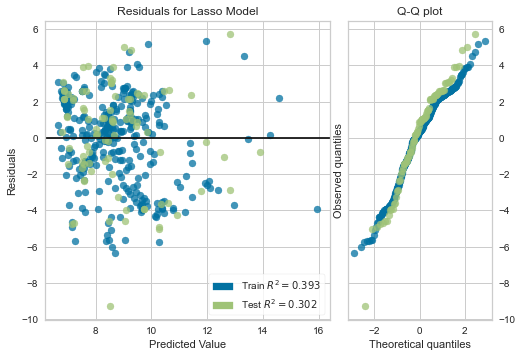

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
visualizer = ResidualsPlot(lasso_model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [40]:
ic = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\04_ICoSS\CSV\2022_IC_Feb.csv")
ic.dropna(inplace=True) # Drop null values
ic.columns = ic.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
ic.set_index('id', inplace=True)
ic.head()

,zonetype,area,vol,level,h,orien,nef,aef,lef,naz,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
IC_F0_O_M01,Meeting Room,88.25,317.7,0,3.6,320,2,113.4,0.02421,3,...,0.35694,1.28499,18.067984,10.859670,0.007787,1.012978,12.652284,0.617486,321.823240,2.837947
IC_F0_O_O01,Shared Cellular Office,21.00,75.6,0,3.6,95,1,25.2,0.00538,3,...,0.33333,1.20000,18.470219,11.261905,0.005941,0.340806,12.284658,0.599544,25.764964,1.022419
IC_F1_EF_LB01,Lab,117.00,421.2,1,3.6,50,2,133.2,0.02844,4,...,0.31624,1.13846,16.566711,9.358396,0.005856,0.813475,11.878409,0.579717,342.635759,2.572341
IC_F1_EF_SR01,Seminar Room,84.00,302.4,1,3.6,320,2,93.6,0.01998,1,...,0.30952,1.11429,14.548789,7.340474,0.005640,0.778989,12.346712,0.602573,235.566316,2.516734
IC_F1_O_M01,Meeting Room,36.00,129.6,1,3.6,320,2,50.4,0.01076,1,...,0.38889,1.40000,17.090515,9.882200,0.007090,1.482804,14.604499,0.712762,192.171388,3.812924


In [41]:
ic1 = ic[['orien', 'nef', 'aef', 'aefa', 'lpw', 'q4','ach', 'hum']]
target_ic1 = pd.Series(ic.pm25)
ic1.head()

,orien,nef,aef,aefa,lpw,q4,ach,hum
id,,,,,,,,
IC_F0_O_M01,320,2,113.4,1.28499,0.00730,2.837947,1.012978,0.007787
IC_F0_O_O01,95,1,25.2,1.20000,0.00999,1.022419,0.340806,0.005941
IC_F1_EF_LB01,50,2,133.2,1.13846,0.00999,2.572341,0.813475,0.005856
IC_F1_EF_SR01,320,2,93.6,1.11429,0.00922,2.516734,0.778989,0.005640
IC_F1_O_M01,320,2,50.4,1.40000,0.00845,3.812924,1.482804,0.007090


In [42]:
ic2=gam2.predict(ic1)

In [43]:
ic2

array([10.03566935,  9.86883074, 10.92369201, 11.12257043, 11.8562696 ,
       12.22831676,  7.25602223,  7.22025476,  7.95842869, 10.24872564,
       11.7622616 ,  7.06278433,  7.00861004,  7.72721986, 10.04355343,
       11.60585568,  7.078813  ,  6.97903425,  7.74791586,  9.94056369])

In [44]:
comp=pd.DataFrame({'Actual':target_ic1, 'Predicted':ic2})
comp

,Actual,Predicted
id,,
IC_F0_O_M01,12.652284,10.035669
IC_F0_O_O01,12.284658,9.868831
IC_F1_EF_LB01,11.878409,10.923692
IC_F1_EF_SR01,12.346712,11.122570
IC_F1_O_M01,14.604499,11.856270
IC_F2_EF_LB01,11.237298,12.228317
IC_F2_EF_LB02,7.904933,7.256022
IC_F2_EF_LB03,6.949315,7.220255
IC_F2_EF_LB04,7.811048,7.958429


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


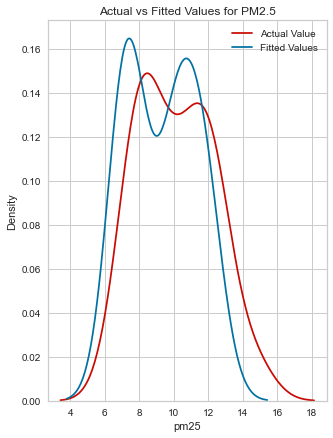

In [45]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(target_ic1, hist=False, color="r", label="Actual Value")
sns.distplot(ic2, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')
plt.legend()

plt.show()
plt.close()

In [46]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((target_ic1 - ic2) / target_ic1)) * 100))

Accuracy 87.94977748197125


In [47]:
# Calculate the absolute errors
errors = abs(ic2 - target_ic1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.28 degrees.


In [48]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_ic1, ic2)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.47


(0.8171369701144111, 1.0948178671578705e-05)

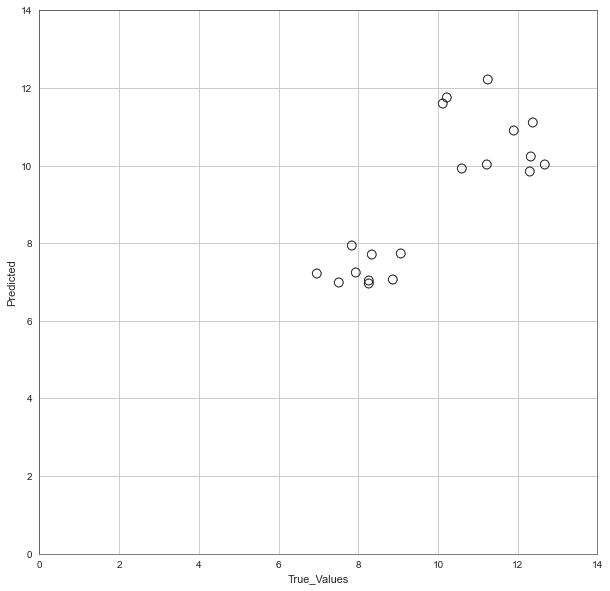

In [49]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = comp, marker="$\u25EF$", color='k', s=100, alpha=1)
plt.ylabel('Predicted')
plt.xlabel('True_Values')
plt.xlim(0,14,0.5)
plt.ylim(0,14,0.5)
from scipy import stats
stats.pearsonr(comp['Actual'], comp['Predicted'])

In [85]:
pred_int=gam2.prediction_intervals(ic1, width=0.95, quantiles=None)

In [86]:
pred_int

array([[5.60148689, 7.86579124],
       [4.53509607, 6.71723853],
       [5.99200397, 8.24528078],
       [6.18669718, 8.40109974],
       [6.36522955, 8.57595882],
       [6.17887544, 8.36036367],
       [4.10164741, 6.26067342],
       [4.22252294, 6.39007984],
       [4.70859519, 6.88902198],
       [5.67744337, 7.92272724],
       [5.91738095, 8.09959226],
       [3.79127385, 5.94419932],
       [3.90378285, 6.06197471],
       [4.40411566, 6.57719522],
       [5.54026157, 7.78820261],
       [5.71991633, 7.90302503],
       [3.60958299, 5.75962566],
       [3.72636586, 5.87859425],
       [4.23201783, 6.40081168],
       [5.50357796, 7.74978213]])

In [35]:
#Fit a model with the default parameters
gam3= LinearGAM(s(0,n_splines=5)+f(1)+s(2,n_splines=5)+s(3,n_splines=5)+s(4,n_splines=5)+s(5,n_splines=5)+s(6,n_splines=5)+s(7,n_splines=5)).fit(X_train.values,y_train.values)

gam3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.8433
Link Function:                     IdentityLink Log Likelihood:                                  -602.4813
Number of Samples:                          357 AIC:                                             1234.6492
                                                AICc:                                            1236.0278
                                                GCV:                                                1.7154
                                                Scale:                                              1.5961
                                                Pseudo R-Squared:                                   0.8309
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [36]:
# Predicting the target values of the test set
y_pred_pre = gam3.predict(X_train)
predi_pre = gam3.prediction_intervals(X_train, width=0.95)

In [37]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_pre)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.239


In [38]:
# Calculate the absolute errors
errors = abs(y_pred_pre - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.98 degrees.


In [39]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, y_pred_pre))

R2 Value: 0.8308515138722807


In [41]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_train - y_pred_pre) / y_train)) * 100))

Accuracy 88.21437623851253


In [42]:
y_train.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\01_TestData_PreTune.csv', index=False)
np.savetxt(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\intervals_pretune.txt', predi_pre, delimiter=',')   # X is an array
predictions_pre = pd.DataFrame(y_pred_pre)
predictions_pre.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\02_PredictedData_PreTune.csv')

In [44]:
results_pre = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\00_GAM_Train\03_Results_PreTune.csv")
results_pre.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,13.326,14.505589
2,8.677,7.790084
3,13.097,12.394547
4,8.393,7.489191
5,12.958,10.081299
...,...,...
353,10.606,9.892057
354,7.690,6.662288
355,5.045,5.224308


(0.9116018128464566, 4.057032596738445e-139)

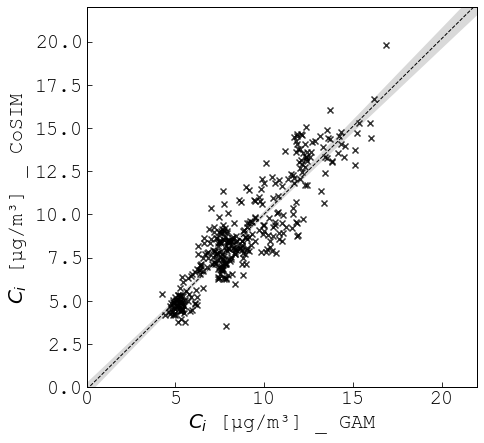

In [46]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.xlim(0,22,1)
plt.ylim(0,22,1)
plt.tick_params( direction="in", length=5)
ax = sb.regplot(x="Predicted_Values", y="True_Values", data=results_pre, ci=95, truncate=False, scatter = True, line_kws={"color":"k","alpha":1,"lw":1, 'ls':'dashed'}, marker='x', color='k')
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ GAM ', fontname="Courier New")
plt.savefig('02_GAM_Reg_pre_TRAINING', dpi=150)
from scipy import stats
stats.pearsonr(results_pre['Predicted_Values'], results_pre['True_Values'])

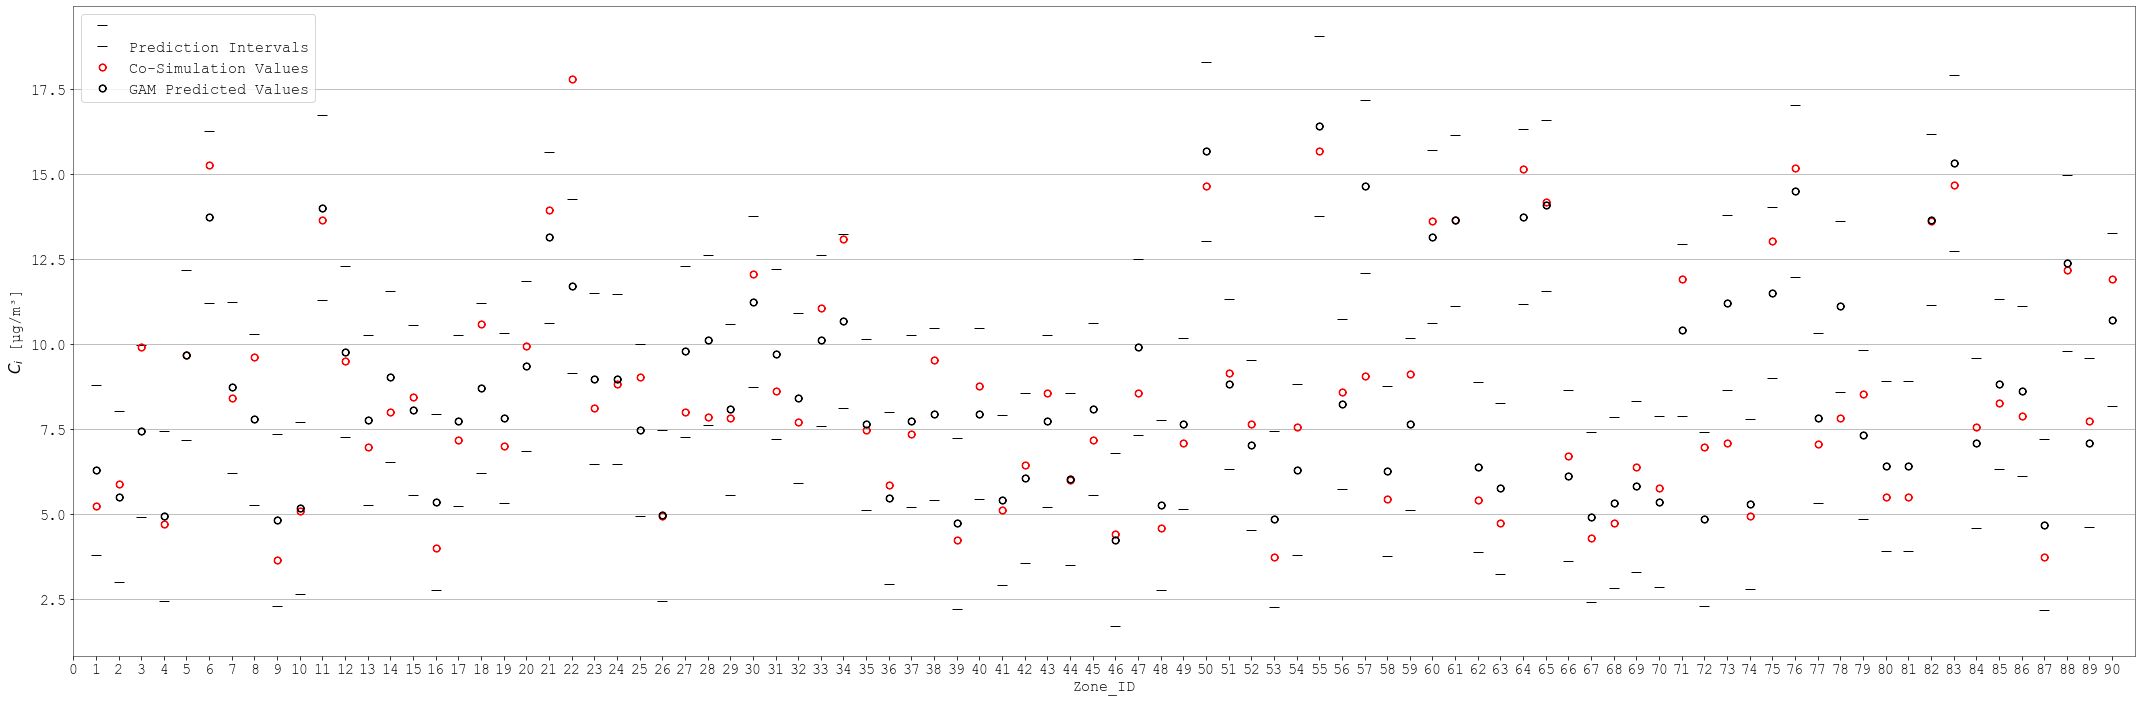

In [43]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(1,91,1)
plt.xticks(results_pre['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results_pre['Upper_pred'], c='k', ls='--', marker='_', label='Square', linewidth=0, markersize=10)
plt.plot(results_pre['Lower_pred'], c='k', ls='--', marker='_', linewidth=0,  markersize=10)
plt.plot(results_pre['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results_pre['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('','Prediction Intervals','Co-Simulation Values','GAM Predicted Values'))
plt.grid(axis='y')

plt.savefig('Feb_GAM_2022_60p_pre', dpi=150)
plt.show()

(0.9043485273194465, 2.6936239852330803e-34)

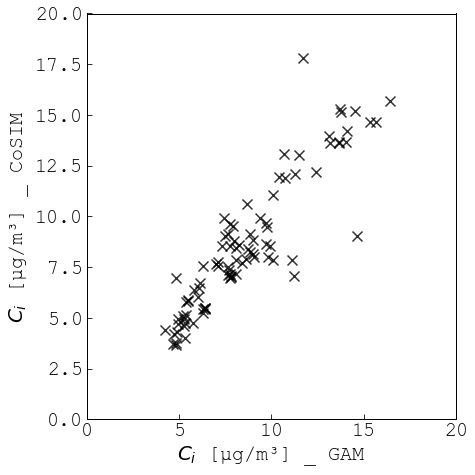

In [51]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results_pre, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ GAM ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Feb_GAM_2022_Pears_60p_PreTune', dpi=150)
from scipy import stats
stats.pearsonr(results_pre['True_Values'], results_pre['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


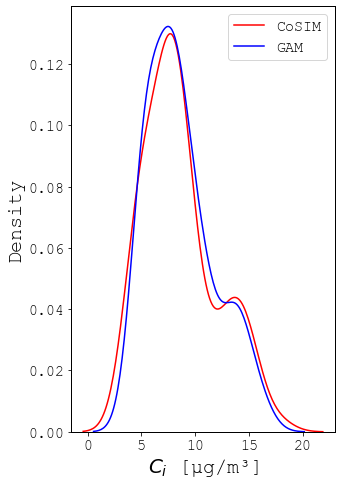

In [52]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results_pre['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results_pre['Predicted_Values'], hist=False, color="b", label="January Indoor PM2.5 [\u03BCg/m\u00b3] (GAM)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','GAM'))
plt.savefig('Feb_GAM_2022_Density_60p_pre', dpi=150)
plt.show()
plt.close()

In [53]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(results_pre['True_Values'], results_pre['Predicted_Values'])), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.416


In [48]:
# Calculate the absolute errors
errors = abs(results_pre['Predicted_Values'] - results_pre['True_Values'])

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.99 degrees.


In [49]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred_pre))

R2 Value: 0.817646355260974


In [50]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((results_pre['True_Values'] - results_pre['Predicted_Values']) / results_pre['True_Values'])) * 100))

Accuracy 87.661972524442
